# Project: We Rate Dogs DataSet.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset that we will be analyzing and visualizing is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates) , also known as [WeRateDogs](https://twitter.com/dog_rates). 
[WeRateDogs](https://twitter.com/dog_rates) is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

The dataset is consistent of two dataframe, twitter_archive, and image_predicitions. Twitter_archive dataframe contains each tweet data such as: tweet id, tweet url, tweet created date, followers count, and favorite count, etc.

Image_predicitions dataframe, is output of neural network that classify breed of dogs on WeRateDogs Twitter archive. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).


<a id="wrangling"></a>
## Data Wrangling

In [1]:
# import all important libraries
import requests
import os
import pandas as pd
import numpy as np
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
import ast
import glob 

Using requests library to fetch the image_predictions data.

In [2]:
#I have run this code and the code in the next line the first time, then I commented them after the file was saved
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [3]:
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

Read in the data for each dataframe `twitter-archive-enhanced.csv`, `image_predicitions.tsv`, and `tweet_json.txt` seperatly.

In [4]:
# read in twitter-archive data
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

#read in image_predicitions data
image_predicitions_df = pd.read_csv('image_predictions.tsv', sep = '\t')

#read in tweet_json data
tweet_df = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

# Assessing 

All assessing notes will be placed below the codes, in the Quality and Tidiness notes section.

In [5]:
#visual assessing the twitter archive data
twitter_archive_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
image_predicitions_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
tweet_df.head(5)

,tweet_id,created_at,favorite_count,retweet_count,followers_count,profile_color,url,source
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,35392,7477,8894574,NaN,h,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,30639,5549,8894574,NaN,h,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,23036,3671,8894574,NaN,h,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,38693,7650,8894574,NaN,h,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,36967,8249,8894574,NaN,h,"<a href=""http://twitter.com/download/iphone"" r..."


In [8]:
#The summary of the data frame, including the number of non_null values in each column
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
image_predicitions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
tweet_id           2331 non-null int64
created_at         2331 non-null object
favorite_count     2331 non-null int64
retweet_count      2331 non-null int64
followers_count    2331 non-null int64
profile_color      0 non-null float64
url                2331 non-null object
source             2331 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 145.8+ KB


In [11]:
#to make sure if rating_denominator is incorrect in some observations.
twitter_archive_df.query('rating_denominator != 10').rating_denominator.count()

23

In [12]:
twitter_archive_df.query('rating_denominator != 10').text

313     @jonnysun @Lin_Manuel ok jomny I know you're e...
342              @docmisterio account started on 11/15/15
433     The floofs have been released I repeat the flo...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
784     RT @dog_rates: After so many requests, this is...
902     Why does this never happen at my front door......
1068    After so many requests, this is Bretagne. She ...
1120    Say hello to this unbelievably well behaved sq...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1598    Yes I do realize a rating of 4/20 would've bee...
1634    Two sneaky puppers were not initially seen, mo...
1635    Someon

In [13]:
# to find if the rating_denominator is not 10 for a reason
for i in range(len(twitter_archive_df.query('rating_denominator != 10').count())):
    print(i, twitter_archive_df.query('rating_denominator != 10').iloc[i].text)
    print('\n')

0 @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho


1 @docmisterio account started on 11/15/15


2 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd


3 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


4 RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…


5 Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE


6 After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ


7 Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv


8 Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a


9 This i

All above tweets have a reason for making `rating_denominator` except for the 8th (1120) and 9th (1156), both have two ratings but the over all rating_denominator = 10, both need to be corrected.

In [14]:
#to make sure if rating_numerator is incorrect in some observations.
twitter_archive_df.query('rating_numerator < 11')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
165,860177593139703809,NaN,NaN,2017-05-04 17:01:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...,7.616730e+17,4.196984e+09,2016-08-05 21:19:27 +0000,https://twitter.com/dog_rates/status/761672994...,10,10,None,None,None,None,None
212,851861385021730816,NaN,NaN,2017-04-11 18:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @eddie_coe98: Thanks @dog_rates completed m...,8.482894e+17,3.410211e+08,2017-04-01 21:42:03 +0000,https://twitter.com/eddie_coe98/status/8482893...,10,10,None,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
232,847962785489326080,NaN,NaN,2017-04-01 00:04:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Georgie. He's very shy. Only puppears ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847962785...,10,10,Georgie,None,None,None,None
274,840698636975636481,8.406983e+17,8.405479e+17,2017-03-11 22:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@0_kelvin_0 &gt;10/10 is reserved for puppos s...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
275,840696689258311684,NaN,NaN,2017-03-11 22:51:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I didn't even have to intervene. Took him 4 mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/840696689...,10,10,None,None,None,None,None
281,839290600511926273,NaN,NaN,2017-03-08 01:44:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @alexmartindawg: THE DRINK IS DR. PUPPER 10...,8.392899e+17,4.119842e+07,2017-03-08 01:41:24 +0000,https://twitter.com/alexmartindawg/status/8392...,10,10,None,None,None,pupper,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None


In [15]:
# how many url with value 'h'?
tweet_df.query('url == "h"').tweet_id.count()

2264

In [16]:
tweet_df.query('url != "h"')

,tweet_id,created_at,favorite_count,retweet_count,followers_count,profile_color,url,source
29,886267009285017600,Sat Jul 15 16:51:35 +0000 2017,110,4,8894575,NaN,n,"<a href=""http://twitter.com/download/iphone"" r..."
54,881633300179243008,Sun Jul 02 21:58:53 +0000 2017,116,7,8894575,NaN,s,"<a href=""http://twitter.com/download/iphone"" r..."
63,879674319642796034,Tue Jun 27 12:14:36 +0000 2017,292,10,8894575,NaN,d,"<a href=""http://twitter.com/download/iphone"" r..."
109,870726314365509632,Fri Jun 02 19:38:25 +0000 2017,113,3,8894575,NaN,s,"<a href=""http://twitter.com/download/iphone"" r..."
142,863427515083354112,Sat May 13 16:15:35 +0000 2017,2060,88,8894575,NaN,0,"<a href=""http://twitter.com/download/iphone"" r..."
164,858860390427611136,Mon May 01 01:47:28 +0000 2017,0,7517,8894575,NaN,…,"<a href=""http://twitter.com/download/iphone"" r..."
172,857214891891077121,Wed Apr 26 12:48:51 +0000 2017,213,17,8894576,NaN,0,"<a href=""http://twitter.com/download/iphone"" r..."
178,856288084350160898,Sun Apr 23 23:26:03 +0000 2017,490,15,8894576,NaN,0,"<a href=""http://twitter.com/download/iphone"" r..."
181,855860136149123072,Sat Apr 22 19:05:32 +0000 2017,4647,911,8894576,NaN,0,"<a href=""http://twitter.com/download/iphone"" r..."
186,855245323840757760,Fri Apr 21 02:22:29 +0000 2017,0,5584,8894577,NaN,…,"<a href=""http://twitter.com/download/iphone"" r..."


In [17]:
#return number of duplicated observations
sum(twitter_archive_df.duplicated()),sum(twitter_archive_df.tweet_id.duplicated())

(0, 0)

In [18]:
sum(tweet_df.duplicated()), sum(tweet_df.tweet_id.duplicated())

(0, 0)

In [19]:
sum(image_predicitions_df.duplicated()), sum(image_predicitions_df.tweet_id.duplicated())

(0, 0)

In [20]:
twitter_archive_df.in_reply_to_status_id.value_counts()

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
8.265984e+17    1
6.780211e+17    1
6.689207e+17    1
6.658147e+17    1
6.737159e+17    1
7.590995e+17    1
8.862664e+17    1
7.384119e+17    1
7.727430e+17    1
7.468859e+17    1
8.634256e+17    1
6.693544e+17    1
6.914169e+17    1
6.920419e+17    1
6.753494e+17    1
7.291135e+17    1
8.406983e+17    1
6.747400e+17    1
7.501805e+17    1
6.744689e+17    1
7.638652e+17    1
6.747934e+17    1
8.503288e+17    1
6.747522e+17    1
8.816070e+17    1
               ..
8.380855e+17    1
8.211526e+17    1
8.558616e+17    1
8.558585e+17    1
7.032559e+17    1
6.678065e+17    1
8.018543e+17    1
7.667118e+17    1
6.855479e+17    1
6.717299e+17    1
6.715610e+17    1
6.758457e+17    1
6.924173e+17    1
7.476487e+17    1
8.381455e+17    1
6.903413e+17    1
8.476062e+17    1
8.352460e+17    1
6.813394e+17    1
8.795538e+17    1
6.860340e+17    1
8.571567e+17    1
6.765883e+17    1
7.044857e+17    1
8.707262e+

In [21]:
twitter_archive_df['retweeted_status_id'].value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

In [22]:
nun_null = twitter_archive_df[twitter_archive_df.in_reply_to_status_id.notnull()]
nun_null

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [23]:
nun_null = twitter_archive_df[twitter_archive_df.retweeted_status_id.notnull()]
nun_null

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [24]:
twitter_archive_df.query('name == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [25]:
twitter_archive_df.query('name == "None"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 5 to 2355
Data columns (total 17 columns):
tweet_id                      745 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     745 non-null object
source                        745 non-null object
text                          745 non-null object
retweeted_status_id           65 non-null float64
retweeted_status_user_id      65 non-null float64
retweeted_status_timestamp    65 non-null object
expanded_urls                 686 non-null object
rating_numerator              745 non-null int64
rating_denominator            745 non-null int64
name                          745 non-null object
doggo                         745 non-null object
floofer                       745 non-null object
pupper                        745 non-null object
puppo                         745 non-null object
dtypes: float64(4), int64(3), object(10)
memory 

In [26]:
twitter_archive_df.iloc[5].text

"Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh"

In [27]:
twitter_archive_df.iloc[7].text

"When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq"

In [28]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [29]:
twitter_archive_df[twitter_archive_df['rating_numerator'] == 1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


## Quality

###### twitter_archive_df
> * Missing data in in_`reply_to_status_id`. 
* Missing data `in_reply_to_user_id`.
* Missing data `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`. 
* Missing data `expanded_urls`.
* 745 dogs with None as their name.
* `tweet_id` is int not str.
* `timestamp` is object not datetime.
> * `rating_denominator` in observations 1120, and 1165 are not 10
> * `rating_numerator` is extracted wrong (sometomes less than 11).
> * 181 rows that have a data comes from retweet.

###### image_predicitions
> * `tweet_id` is int not str
###### tweet_df
> * 0 nun_null values for `profile color` column.
> * `tweet_id` is int not str
> * `url` is extracted wrong (it have incorrect values equal to letters).
------
## Tidiness

> * 1 varibale (`dog_stage`) in 4 columns (`doggo`, `floofer`, `pupper`, `puppo`).
> * `tweet_df`, and `image_predictions` should be part of `twitter_archive_df`.
> * two variables in one column (day and date) in tweet_df. 

# Cleaning

**First** we will create a copy of each data frame to operate data cleaning on.

In [30]:
# create copy od each data frame
twitter_archive_clean = twitter_archive_df.copy()
image_predicitions_clean = image_predicitions_df.copy()
tweet_clean = tweet_df.copy()

**Second** we will clean the missing data.
### Missing Data

###### Define
Twitte-archive: Missing data in in_reply_to_status_id. (78 nun_null out of 2356)

###### Code

In [31]:
# fill in with mean values
mean1 = twitter_archive_clean['in_reply_to_status_id'].mean()
twitter_archive_clean['in_reply_to_status_id'].fillna(mean1,  inplace = True)

###### Test

In [32]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), 

###### Define
Twitte-archive: Missing data in in_reply_to_user_id. (78 nun_null out of 2356), fill in with values mean.

###### Code

In [33]:
mean2 = twitter_archive_clean['in_reply_to_user_id'].mean()
twitter_archive_clean['in_reply_to_user_id'].fillna(mean2,  inplace = True)

###### test

In [34]:
sum(twitter_archive_clean.in_reply_to_user_id.isnull())

0

###### Define
Twitte-archive:181 rows that have a data comes from retweets, drop these rows using isnull().

###### Code

In [35]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isnull()]

twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_timestamp.isnull()]

###### Test

In [36]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         2175 non-null float64
in_reply_to_user_id           2175 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), obje

###### Define
Twitte-archive:retweeted_status_id and _retweetes_status_user_id are columns for retweeted data , instead of filling them we'll drop them.

###### Code

In [37]:
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id'], axis =1, inplace = True)

###### test

In [38]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_timestamp', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

###### Define
Twitte-archive: fill missing data in `retweeted_status_timestamp` is a column from retweeted data, we will drop it.

###### Code

In [39]:
twitter_archive_clean.drop(['retweeted_status_timestamp'], axis =1, inplace = True)

###### test

In [40]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

###### Define
Twitte-archive: fill missing data `expanded_urls` by filling the `tweet_id` to the end of the link: 	https://twitter.com/dog_rates/status/ `tweet_id` . (2297 nun_null out of 2356)

###### Code

In [41]:

twitter_archive_clean.expanded_urls = 'https://twitter.com/dog_rates/status/' + str(twitter_archive_clean.tweet_id) 

###### test

In [42]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    2175 non-null float64
in_reply_to_user_id      2175 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2175 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


###### Define

Tweet_df: drop `profile_color` column, 0 nun_null values for profile color column

###### code

In [43]:
tweet_clean.drop(['profile_color'], axis = 1, inplace = True)

###### test

In [44]:
tweet_clean.columns

Index(['tweet_id', 'created_at', 'favorite_count', 'retweet_count',
       'followers_count', 'url', 'source'],
      dtype='object')

**Third** we will clean the untidy data.
### Tidiness

1 varibale (`dog_phase`) in 4 columns (`doggo`, `floofer`, `pupper`, `puppo`).

###### Define

create column called `dog_phase` and set a default value = `doggo`, then write a function that assign the right dog_phase to the column

###### code

In [45]:
twitter_archive_clean['dog_stage'] = 'doggo'


for i in ['doggo', 'floofer', 'pupper', 'puppo']:
    for n in twitter_archive_clean.index:
        if twitter_archive_clean[i][n] != 'None':
            twitter_archive_clean['dog_stage'][n] = i

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [46]:
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

###### test

In [47]:
twitter_archive_clean.dog_stage.value_counts()

doggo      1906
pupper      234
puppo        25
floofer      10
Name: dog_stage, dtype: int64

tweet_df should be part of twitter_archive_df.

###### Define

1st drop `url`, `created_at`, and `source` columns from `tweet_clean` because they are duplicated in `twitter_archive_clean`. 2nd merge the `tweet`, and `image_predictions` tables with `twitter_archive` table on = `tweet_id`.

###### code

In [48]:
#drop duplicated columns
tweet_clean.drop(['url', 'source', 'created_at'], axis = 1, inplace = True)

In [49]:
#merge twitter_archive and tweet dataframes on tweet_id
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_clean, on = 'tweet_id')
twitter_archive_master = pd.merge(twitter_archive_clean, image_predicitions_clean, on = 'tweet_id')

###### test

In [50]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,7.455079e+17,2.014171e+16,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/0 8...,13,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,7.455079e+17,2.014171e+16,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/0 8...,13,10,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,7.455079e+17,2.014171e+16,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/0 8...,12,10,Archie,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,7.455079e+17,2.014171e+16,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/0 8...,13,10,Darla,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,7.455079e+17,2.014171e+16,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/0 8...,12,10,Franklin,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


Third tidiness issue: two variables in one column (day and date) in tweet_df.
have been solved when the column was droped and the two dataframes were merged.

**forth** we will clean the quality issues.

### Quality

tweet_id is int not str.

###### Define

convert the tweet_id column's data type from int to string using astype.

###### Code

In [51]:
#fillchar is to make sure that the last 0 in the id is included.
twitter_archive_master.tweet_id = twitter_archive_master.tweet_id.astype(str).str.pad(18, fillchar = '0')

###### Test

In [52]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 25 columns):
tweet_id                 1987 non-null object
in_reply_to_status_id    1987 non-null float64
in_reply_to_user_id      1987 non-null float64
timestamp                1987 non-null object
source                   1987 non-null object
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null int64
rating_denominator       1987 non-null int64
name                     1987 non-null object
dog_stage                1987 non-null object
favorite_count           1987 non-null int64
retweet_count            1987 non-null int64
followers_count          1987 non-null int64
jpg_url                  1987 non-null object
img_num                  1987 non-null int64
p1                       1987 non-null object
p1_conf                  1987 non-null float64
p1_dog                   1987 non-null bool
p2                      

twitter_archive: timestamp is object not datetime.

###### Define

convert the timestamp column's data type from object to datetime using astype.

###### Code

In [53]:
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp, format = "%Y-%m-%d %H:%M:%S")

###### test

In [54]:
twitter_archive_master.info('timestamp')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 25 columns):
tweet_id                 1987 non-null object
in_reply_to_status_id    1987 non-null float64
in_reply_to_user_id      1987 non-null float64
timestamp                1987 non-null datetime64[ns]
source                   1987 non-null object
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null int64
rating_denominator       1987 non-null int64
name                     1987 non-null object
dog_stage                1987 non-null object
favorite_count           1987 non-null int64
retweet_count            1987 non-null int64
followers_count          1987 non-null int64
jpg_url                  1987 non-null object
img_num                  1987 non-null int64
p1                       1987 non-null object
p1_conf                  1987 non-null float64
p1_dog                   1987 non-null bool
p2              

`rating_denominator` in observations 1120, and 1165 are not 10

###### Define

assign `rating_denominator` = 10 for row 1120 and 1165

###### Code

In [55]:
twitter_archive_master.rating_denominator.iloc[1120] = 10
twitter_archive_master.rating_denominator.iloc[1165] = 10
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype('float')

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


###### Test

In [56]:
twitter_archive_master.rating_denominator.iloc[1120], twitter_archive_master.rating_denominator.iloc[1165]

(10, 10)

rating_numerator is extracted wrong (sometomes less than 11).

###### Define
create for loop to iterate through rating_numerator values with decimal.

this solution is taken from this [github repo](https://github.com/Abhishek20182/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb) code line 99.

###### code

In [57]:
import re

# For loop to gather all text, indices, and ratings for tweets that contain a decimal in the numerator of the rating
ratings_decimals_text = []
ratings_decimals_index = []
ratings_decimals = []

for i, text in twitter_archive_master['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_decimals_text.append(text)
        ratings_decimals_index.append(i)
        ratings_decimals.append(re.search('\d+\.\d+', text).group())
    

# Print ratings with decimals        
ratings_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [58]:
# Print the indices of the ratings above (have decimal)
ratings_decimals_index

[39, 499, 548, 1368]

In [59]:
#Correctly converting the above decimal ratings to float
for i in range(len(ratings_decimals_index)):
    twitter_archive_master.loc[ratings_decimals_index[i],'rating_numerator'] = float(ratings_decimals[i])

###### Test

In [60]:
twitter_archive_master.iloc[44]

tweet_id                                                882627270321602560
in_reply_to_status_id                                          7.45508e+17
in_reply_to_user_id                                            2.01417e+16
timestamp                                              2017-07-05 15:48:34
source                   <a href="http://twitter.com/download/iphone" r...
text                     This is Stanley. He has his first swim lesson ...
expanded_urls            https://twitter.com/dog_rates/status/0       8...
rating_numerator                                                        13
rating_denominator                                                      10
name                                                               Stanley
dog_stage                                                            doggo
favorite_count                                                       25740
retweet_count                                                         5377
followers_count          

In [61]:
twitter_archive_master.rating_numerator = twitter_archive_master.rating_numerator.replace(1776, 17.76)
twitter_archive_master.rating_numerator = twitter_archive_master.rating_numerator.replace(960, 9.6)
twitter_archive_master.rating_numerator = twitter_archive_master.rating_numerator.replace(666, 6.66)


**fifth** save clean dataframe to use in analysis and visualization.

In [62]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

-------------------------------------------------------

<a id="eda"></a>
## Exploratory Data Analysis


Three quastions will be asked and answered:

**1** Which type of dog phase gets more favorite count?

**2** Does the rating_numerator has effect on the favourite count?

**3** What is the most posted dog's breed?

In [63]:
#read in the data
twitter_archive = pd.read_csv('twitter_archive_master.csv')

In [64]:
#take a brief look at the data
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,7.455079e+17,2.014171e+16,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/0 8...,13.0,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,7.455079e+17,2.014171e+16,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/0 8...,13.0,10,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,7.455079e+17,2.014171e+16,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/0 8...,12.0,10,Archie,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,7.455079e+17,2.014171e+16,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/0 8...,13.0,10,Darla,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,7.455079e+17,2.014171e+16,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/0 8...,12.0,10,Franklin,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [65]:
#THIS returns a useful descriptive statistics for each column of data.
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,favorite_count,retweet_count,followers_count,img_num,p1_conf,p2_conf,p3_conf
count,1.987000e+03,1.987000e+03,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1.987000e+03,1.987000e+03
mean,7.356264e+17,7.449558e+17,1.990856e+16,11.352058,10.533971,8092.735279,2386.054353,8.894588e+06,1.203322,0.593317,1.344725e-01,6.037114e-02
std,6.739210e+16,6.862489e+15,2.154975e+15,12.599820,7.333532,11921.956655,4270.387513,6.448900e+01,0.561369,0.271959,1.005706e-01,5.091543e-02
min,6.660209e+17,6.671522e+17,4.196984e+09,0.000000,2.000000,69.000000,11.000000,8.894574e+06,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758218e+17,7.455079e+17,2.014171e+16,10.000000,10.000000,1733.500000,534.000000,8.894579e+06,1.000000,0.361531,5.409535e-02,1.624950e-02
50%,7.083495e+17,7.455079e+17,2.014171e+16,11.000000,10.000000,3660.000000,1154.000000,8.894583e+06,1.000000,0.587342,1.175080e-01,4.953060e-02
75%,7.873602e+17,7.455079e+17,2.014171e+16,12.000000,10.000000,10057.500000,2721.500000,8.894584e+06,1.000000,0.844583,1.950575e-01,9.180755e-02
max,8.924206e+17,8.558181e+17,2.014171e+16,420.000000,170.000000,152564.000000,75495.000000,8.895261e+06,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Qustion 1 Which type of dog phase gets more favorite count?

In [66]:
twitter_archive.dog_stage.value_counts()

doggo      1744
pupper      212
puppo        23
floofer       8
Name: dog_stage, dtype: int64

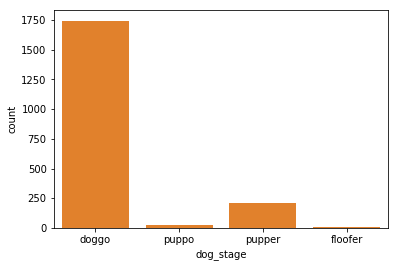

In [67]:
#plot the value_counts for each value

sn.countplot(data = twitter_archive, x='dog_stage', color = sn.color_palette()[1])

calculate the count of favorite count for each type `dog_phase`.

In [68]:
#calculate the count of favorite count for each type
doggo_sum = sum(twitter_archive.favorite_count[twitter_archive.dog_stage == 'doggo'])
puppo_sum = sum(twitter_archive.favorite_count[twitter_archive.dog_stage == 'puppo'])
pupper_sum = sum(twitter_archive.favorite_count[twitter_archive.dog_stage == 'pupper'])
floofer_sum = sum(twitter_archive.favorite_count[twitter_archive.dog_stage == 'floofer'])
doggo_sum, puppo_sum, pupper_sum, floofer_sum

(14050942, 494606, 1436695, 98022)

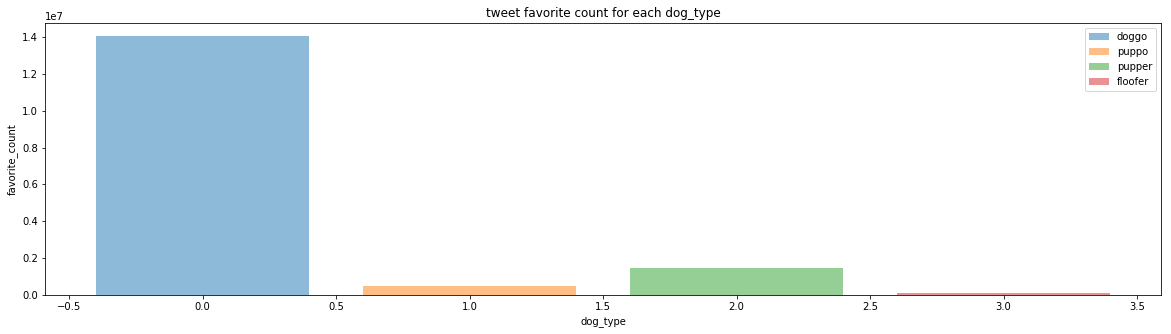

In [69]:
#plot the sum for each type
#plot for comparsion 
y = [doggo_sum,  puppo_sum, pupper_sum, floofer_sum]

#figure size
plt.figure(figsize=[20,5])

for i, n in enumerate(['doggo', 'puppo', 'pupper', 'floofer']):
    plt.bar(i, y[i], alpha = 0.5, label = n)
plt.xlabel('dog_type')
plt.ylabel('favorite_count')
plt.legend()
plt.title('tweet favorite count for each dog_type')

plt.show()


calculate the mean of favorite count for each type `dog_phase`.

In [70]:
#calculate the mean of favorite count for each type
doggo_mean = twitter_archive.favorite_count[twitter_archive.dog_stage == 'doggo'].mean()
puppo_mean = twitter_archive.favorite_count[twitter_archive.dog_stage == 'puppo'].mean()
pupper_mean = twitter_archive.favorite_count[twitter_archive.dog_stage == 'pupper'].mean()
floofer_mean = twitter_archive.favorite_count[twitter_archive.dog_stage == 'floofer'].mean()
doggo_mean, puppo_mean, pupper_mean, floofer_mean

(8056.7327981651379, 21504.608695652172, 6776.8632075471696, 12252.75)

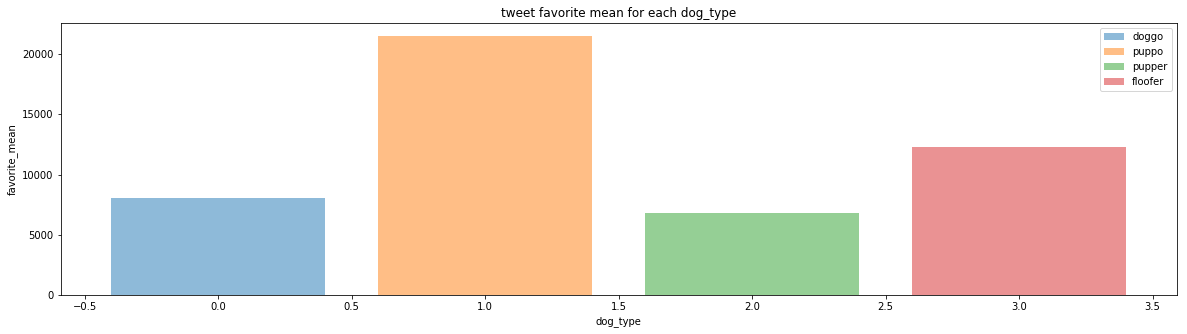

In [71]:
#plot the mean for each type
#plot for comparsion 
y = [doggo_mean,  puppo_mean, pupper_mean, floofer_mean]

#figure size
plt.figure(figsize=[20,5])

for i, n in enumerate(['doggo', 'puppo', 'pupper', 'floofer']):
    plt.bar(i, y[i], alpha = 0.5, label = n)
plt.xlabel('dog_type')
plt.ylabel('favorite_mean')
plt.legend()
plt.title('tweet favorite mean for each dog_type')

plt.show()


Dogs with puppo type have higher favorite_mean = 17200 aproximatly, dogs with pupper type have the lowest favorite_mean = 6200 approximatly.

#### Qustion 2 Does the rating have effect on the favourite count?

When WeRateDogs post specific rating for each tweet does it effect the count of favorite for the tweet? 

In [72]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,favorite_count,retweet_count,followers_count,img_num,p1_conf,p2_conf,p3_conf
count,1.987000e+03,1.987000e+03,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1.987000e+03,1.987000e+03
mean,7.356264e+17,7.449558e+17,1.990856e+16,11.352058,10.533971,8092.735279,2386.054353,8.894588e+06,1.203322,0.593317,1.344725e-01,6.037114e-02
std,6.739210e+16,6.862489e+15,2.154975e+15,12.599820,7.333532,11921.956655,4270.387513,6.448900e+01,0.561369,0.271959,1.005706e-01,5.091543e-02
min,6.660209e+17,6.671522e+17,4.196984e+09,0.000000,2.000000,69.000000,11.000000,8.894574e+06,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758218e+17,7.455079e+17,2.014171e+16,10.000000,10.000000,1733.500000,534.000000,8.894579e+06,1.000000,0.361531,5.409535e-02,1.624950e-02
50%,7.083495e+17,7.455079e+17,2.014171e+16,11.000000,10.000000,3660.000000,1154.000000,8.894583e+06,1.000000,0.587342,1.175080e-01,4.953060e-02
75%,7.873602e+17,7.455079e+17,2.014171e+16,12.000000,10.000000,10057.500000,2721.500000,8.894584e+06,1.000000,0.844583,1.950575e-01,9.180755e-02
max,8.924206e+17,8.558181e+17,2.014171e+16,420.000000,170.000000,152564.000000,75495.000000,8.895261e+06,4.000000,1.000000,4.880140e-01,2.734190e-01


max value for rating_numerator = 420, min = 0, std = 14.96, 3rd quratile = 12, 75% of the ratings is equal or less than 12.

create column for the rating for each tweet in decimel.  

In [73]:
#create rating column
twitter_archive['rating'] = twitter_archive['rating_numerator']/ twitter_archive['rating_denominator']

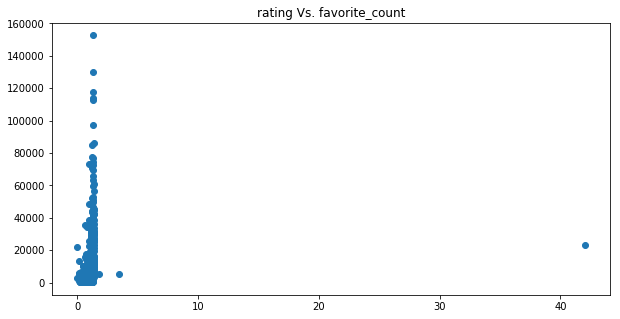

In [74]:
# plot rating Vs. favorite_count
plt.figure(figsize=[10,5])

#plot 1 
plt.scatter(twitter_archive.rating, twitter_archive.favorite_count)
plt.title('rating Vs. favorite_count')
plt.show()

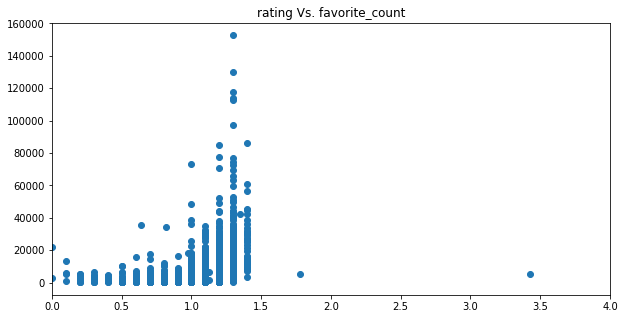

In [75]:
#plot 2
#removing the outliers
plt.figure(figsize=[10,5])
plt.scatter(twitter_archive.rating, twitter_archive.favorite_count)
plt.xlim(0, 4)
plt.title('rating Vs. favorite_count')
plt.show()

Most ratings falls between 0.5 and 1.5, $0.5 < rating \leq 1.5$. And within this range tweets have the highest favorite count.

#### Qustion 3 What is the most posted dog's breed?

In [76]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,favorite_count,retweet_count,followers_count,img_num,p1_conf,p2_conf,p3_conf,rating
count,1.987000e+03,1.987000e+03,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1.987000e+03,1.987000e+03,1987.000000
mean,7.356264e+17,7.449558e+17,1.990856e+16,11.352058,10.533971,8092.735279,2386.054353,8.894588e+06,1.203322,0.593317,1.344725e-01,6.037114e-02,1.076164
std,6.739210e+16,6.862489e+15,2.154975e+15,12.599820,7.333532,11921.956655,4270.387513,6.448900e+01,0.561369,0.271959,1.005706e-01,5.091543e-02,0.945851
min,6.660209e+17,6.671522e+17,4.196984e+09,0.000000,2.000000,69.000000,11.000000,8.894574e+06,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000
25%,6.758218e+17,7.455079e+17,2.014171e+16,10.000000,10.000000,1733.500000,534.000000,8.894579e+06,1.000000,0.361531,5.409535e-02,1.624950e-02,1.000000
50%,7.083495e+17,7.455079e+17,2.014171e+16,11.000000,10.000000,3660.000000,1154.000000,8.894583e+06,1.000000,0.587342,1.175080e-01,4.953060e-02,1.100000
75%,7.873602e+17,7.455079e+17,2.014171e+16,12.000000,10.000000,10057.500000,2721.500000,8.894584e+06,1.000000,0.844583,1.950575e-01,9.180755e-02,1.200000
max,8.924206e+17,8.558181e+17,2.014171e+16,420.000000,170.000000,152564.000000,75495.000000,8.895261e+06,4.000000,1.000000,4.880140e-01,2.734190e-01,42.000000


`p1_conf` has the highest probability for each picture classifiy, then it will be used in our insight.

In [77]:
twitter_archive.p1.value_counts()

golden_retriever             139
Labrador_retriever            93
Pembroke                      88
Chihuahua                     79
pug                           54
chow                          41
Samoyed                       39
Pomeranian                    38
toy_poodle                    37
malamute                      29
cocker_spaniel                27
French_bulldog                25
Chesapeake_Bay_retriever      23
miniature_pinscher            22
seat_belt                     21
German_shepherd               20
Siberian_husky                20
teddy                         18
Staffordshire_bullterrier     18
Shetland_sheepdog             18
Eskimo_dog                    18
Maltese_dog                   18
Cardigan                      17
Rottweiler                    17
Shih-Tzu                      17
beagle                        17
Italian_greyhound             16
Lakeland_terrier              16
kuvasz                        16
web_site                      15
          

Excluding dog breeds with value count less than 30.

In [78]:
value_count = twitter_archive['p1'].value_counts()[list(range(11))]
value_count

golden_retriever      139
Labrador_retriever     93
Pembroke               88
Chihuahua              79
pug                    54
chow                   41
Samoyed                39
Pomeranian             38
toy_poodle             37
malamute               29
cocker_spaniel         27
Name: p1, dtype: int64

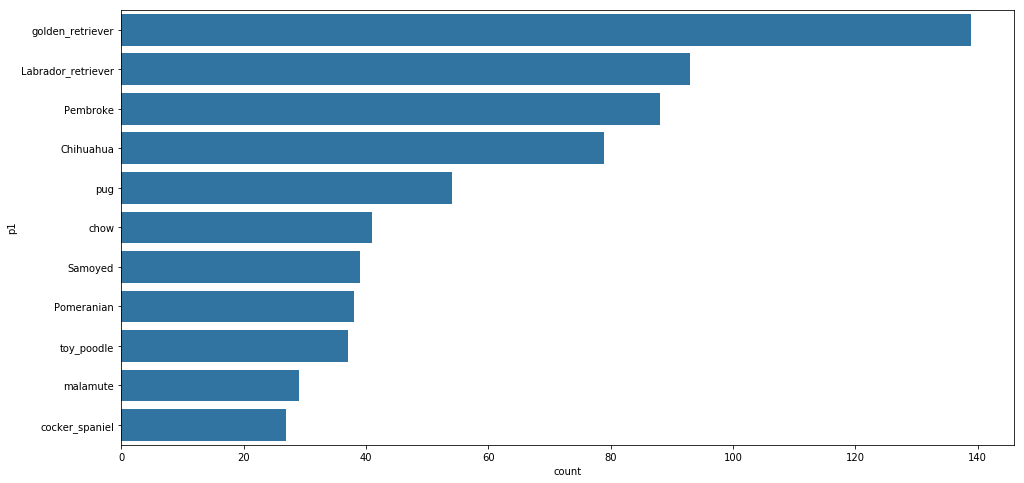

In [79]:
#use seaborn countplot to plot count for each dog breed
type_order = value_count.index

n = twitter_archive.shape[0]
max_type_count = value_count[0]
max_prop = max_type_count/ n

plt.figure(figsize=[16,8])

sn.countplot(data = twitter_archive, y = 'p1', color = sn.color_palette()[0], order = type_order);


Golden retriever breed has the highest count = 150, and next in line Labrador retriever breed (count = 100). Both seem popular or most owned by people.